<a href="https://colab.research.google.com/github/IanTirok/KNN-and-Naive-Bayes-practice/blob/main/Moringa_Data_Science_Core_Module_2_W4_Independent_Project_2021_08_Ian_Tirok_Python_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### Understanding the Context

What comes to mind when you think of spam? Miracle pills from Internet pharmacies, requests for money from “princes” of other countries, or perhaps the food, Spam? 

Spam is any kind of unwanted, unsolicited digital communication that gets sent out in bulk. Often spam is sent via email, but it can also be distributed via text messages, phone calls, or social media.

### Specifying the Question

I will be using the Naive Bayes model for my analysis. I will us grid search cv to improve the accuracy of the base model through different metrics used such as the minkowski and the manhattan.

I intend to succesfully be able to identify spam messages


### Metrics for Success

The metric of success for this project is the model accuracy. The model accuracy shows how well a particular model predicts the dependent variable when tested after training it. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit while an accuracy of 1 is not good either since the model is overfitted. In this project, my aim is to achieve an accuracy of at least 90%.

### The Experimental Design

The experimental design for this project is as follows:


*   Loading the libraries and dataset
*   Data cleaning and preparation
*   Performing the Univariate analysis
*   Performing the Bivariate analysis
*   Performing the Multivariate analysis
*   Applying the Bayesian models - Gaussian, Multinomial and Bernoulli
*   Applying the GridSearch CV to test through different parameters
*   Making predictions using the different models that I've created
*   Assesing the accuracy of the models created
*   Making conclusions and challenging the solution




## 2. Reading the Data

In [72]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.regression.quantile_regression as quant
import scipy as sp
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from numpy import logspace
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [4]:
# Loading the spambase dataset
# Loading the names files first so that we can use the column names in our dataset
with open("/content/drive/MyDrive/Core Module 2 Wk 4 IP/spambase.names") as f:
  print(f.read())

# Reading the spambase dataset
df = pd.read_csv('/content/drive/MyDrive/Core Module 2 Wk 4 IP/spambase.data')

# Renaming the columns in our dataset
df.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

## 3. Checking the Data

In [5]:
df.shape

(4600, 58)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [7]:
df.head()

word_freq_make  word_freq_address  ...  capital_run_length_total  class
0            0.21               0.28  ...                      1028      1
1            0.06               0.00  ...                      2259      1
2            0.00               0.00  ...                       191      1
3            0.00               0.00  ...                       191      1
4            0.00               0.00  ...                        54      1

[5 rows x 58 columns]

In [8]:
df.tail()

word_freq_make  word_freq_address  ...  capital_run_length_total  class
4595            0.31               0.00  ...                        88      0
4596            0.00               0.00  ...                        14      0
4597            0.30               0.00  ...                       118      0
4598            0.96               0.00  ...                        78      0
4599            0.00               0.00  ...                        40      0

[5 rows x 58 columns]

In [9]:
df.sample()

word_freq_make  word_freq_address  ...  capital_run_length_total  class
1929            0.00               0.00  ...                        76      0

[1 rows x 58 columns]

In [10]:
df.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

## 4. Tidying the Dataset

In [11]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


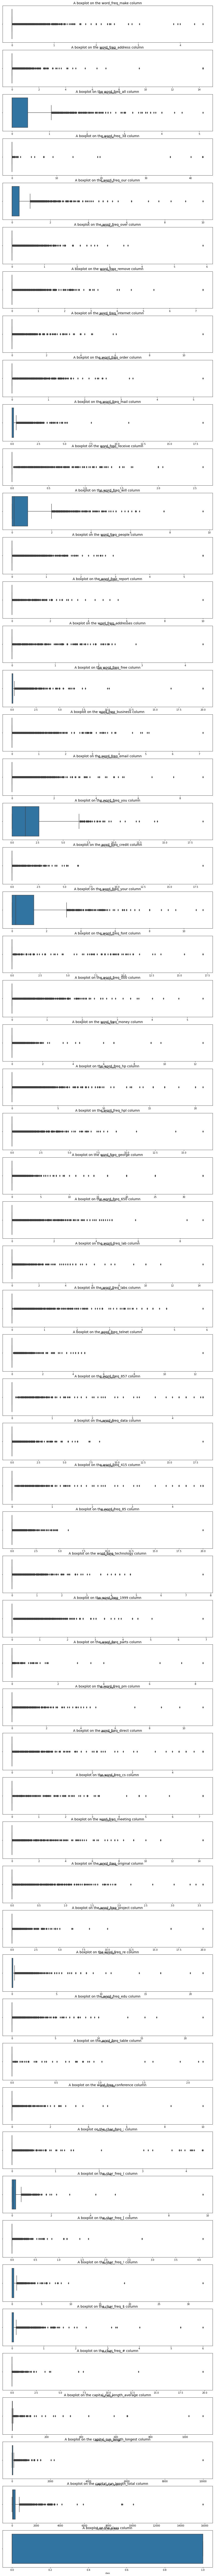

In [12]:
# Checking for Outliers


col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
fig, ax = plt.subplots(len(col_names), figsize = (16,200))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [13]:
#There seems to be very many outliers but lets count them to be sure

df1 = df[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()


word_freq_make                1053
word_freq_address              897
word_freq_all                  338
word_freq_3d                    47
word_freq_our                  501
word_freq_over                 999
word_freq_remove               807
word_freq_internet             824
word_freq_order                773
word_freq_mail                 852
word_freq_receive              709
word_freq_will                 270
word_freq_people               852
word_freq_report               357
word_freq_addresses            336
word_freq_free                 956
word_freq_business             963
word_freq_email               1037
word_freq_you                   75
word_freq_credit               424
word_freq_your                 229
word_freq_font                 117
word_freq_000                  679
word_freq_money                735
word_freq_hp                  1090
word_freq_hpl                  811
word_freq_george               780
word_freq_650                  463
word_freq_lab       

There seems to be very many outliers, if we decide to drop them, the data may not be sufficient for the analysis

In [14]:
# Identifying the Missing Data
#
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [15]:
df.shape

(4600, 58)

In [16]:
# Dealing with the Missing Data
# There are no missing records. Lets procceed

In [17]:
# Identifying the duplicate Data


len(df)-len(df.drop_duplicates())

391

In [18]:
# Dealing with the Duplicate Data

df = df.drop_duplicates()

In [19]:
#Standardizing column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## 5. Exploratory Analysis

###Measures of central tendancy


In [18]:
#getting summary
df.describe(include='all')

word_freq_make  word_freq_address  ...  capital_run_length_total   class
count         4209.00            4209.00  ...                   4209.00 4209.00
mean             0.10               0.11  ...                    291.19    0.40
std              0.30               0.45  ...                    618.73    0.49
min              0.00               0.00  ...                      1.00    0.00
25%              0.00               0.00  ...                     40.00    0.00
50%              0.00               0.00  ...                    101.00    0.00
75%              0.00               0.00  ...                    273.00    1.00
max              4.54              14.28  ...                  15841.00    1.00

[8 rows x 58 columns]

What is the most appearing number in each column?

In [19]:
# Mode
# Calculating mode across different columns

a = df[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']].mode().head(1)

arr = a.to_numpy()
arr


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1., 11.,  7.,  0.]])

In [20]:
modedf =pd.DataFrame()
modedf

data = {'Criteria':[ 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'], 
       'The most appearing record': [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1., 11.,  7.,  0.]} 
modedf =pd.DataFrame(data)
modedf

Criteria  The most appearing record
0               word_freq_make                       0.00
1            word_freq_address                       0.00
2                word_freq_all                       0.00
3                 word_freq_3d                       0.00
4                word_freq_our                       0.00
5               word_freq_over                       0.00
6             word_freq_remove                       0.00
7           word_freq_internet                       0.00
8              word_freq_order                       0.00
9               word_freq_mail                       0.00
10           word_freq_receive                       0.00
11              word_freq_will                       0.00
12            word_freq_people                       0.00
13            word_freq_report                       0.00
14         word_freq_addresses                       0.00
15              word_freq_free                       0.00
16          word_freq_business                       0.00
17             word_freq_email                       0.00
18               word_freq_you                       0.00
19            word_freq_credit                       0.00
20              word_freq_your                       0.00
21              word_freq_font                       0.00
22               word_freq_000                       0.00
23             word_freq_money                       0.00
24                word_freq_hp                       0.00
25               word_freq_hpl                       0.00
26            word_freq_george                       0.00
27               word_freq_650                       0.00
28               word_freq_lab                       0.00
29              word_freq_labs                       0.00
30            word_freq_telnet                       0.00
31               word_freq_857                       0.00
32              word_freq_data                       0.00
33               word_freq_415                       0.00
34                word_freq_85                       0.00
35        word_freq_technology                       0.00
36              word_freq_1999                       0.00
37             word_freq_parts                       0.00
38                word_freq_pm                       0.00
39            word_freq_direct                       0.00
40                word_freq_cs                       0.00
41           word_freq_meeting                       0.00
42          word_freq_original                       0.00
43           word_freq_project                       0.00
44                word_freq_re                       0.00
45               word_freq_edu                       0.00
46             word_freq_table                       0.00
47        word_freq_conference                       0.00
48                 char_freq_;                       0.00
49                  char_freq_                       0.00
50                 char_freq_[                       0.00
51                 char_freq_!                       0.00
52                 char_freq_$                       0.00
53                 char_freq_#                       0.00
54  capital_run_length_average                       1.00
55  capital_run_length_longest                      11.00
56    capital_run_length_total                       7.00
57                       class                       0.00

What is the average of each column

In [21]:
# Mean

# Calculating mean across different columns

a = df.mean()

a
a
mean = pd.DataFrame(a)
mean.index.name = 'Criteria'
mean
mean.rename(columns={0: 'Mean'},inplace=True, errors='raise')
mean

Mean
Criteria                         
word_freq_make               0.10
word_freq_address            0.11
word_freq_all                0.29
word_freq_3d                 0.06
word_freq_our                0.33
word_freq_over               0.10
word_freq_remove             0.12
word_freq_internet           0.11
word_freq_order              0.09
word_freq_mail               0.25
word_freq_receive            0.06
word_freq_will               0.57
word_freq_people             0.10
word_freq_report             0.06
word_freq_addresses          0.04
word_freq_free               0.25
word_freq_business           0.15
word_freq_email              0.19
word_freq_you                1.72
word_freq_credit             0.08
word_freq_your               0.81
word_freq_font               0.13
word_freq_000                0.10
word_freq_money              0.09
word_freq_hp                 0.57
word_freq_hpl                0.28
word_freq_george             0.37
word_freq_650                0.13
word_freq_lab                0.10
word_freq_labs               0.10
word_freq_telnet             0.06
word_freq_857                0.04
word_freq_data               0.10
word_freq_415                0.05
word_freq_85                 0.11
word_freq_technology         0.10
word_freq_1999               0.14
word_freq_parts              0.01
word_freq_pm                 0.08
word_freq_direct             0.06
word_freq_cs                 0.04
word_freq_meeting            0.14
word_freq_original           0.05
word_freq_project            0.09
word_freq_re                 0.32
word_freq_edu                0.19
word_freq_table              0.01
word_freq_conference         0.03
char_freq_;                  0.04
char_freq_                   0.14
char_freq_[                  0.02
char_freq_!                  0.28
char_freq_$                  0.08
char_freq_#                  0.05
capital_run_length_average   5.38
capital_run_length_longest  52.14
capital_run_length_total   291.19
class                        0.40

What is the middle record of each column

In [22]:
# Median
# Calculating the median for across different columns

a = df.median()

a
median = pd.DataFrame(a)
median.index.name = 'Criteria'
median
median.rename(columns={0: 'Median'},inplace=True, errors='raise')
median

Median
Criteria                          
word_freq_make                0.00
word_freq_address             0.00
word_freq_all                 0.00
word_freq_3d                  0.00
word_freq_our                 0.00
word_freq_over                0.00
word_freq_remove              0.00
word_freq_internet            0.00
word_freq_order               0.00
word_freq_mail                0.00
word_freq_receive             0.00
word_freq_will                0.19
word_freq_people              0.00
word_freq_report              0.00
word_freq_addresses           0.00
word_freq_free                0.00
word_freq_business            0.00
word_freq_email               0.00
word_freq_you                 1.36
word_freq_credit              0.00
word_freq_your                0.29
word_freq_font                0.00
word_freq_000                 0.00
word_freq_money               0.00
word_freq_hp                  0.00
word_freq_hpl                 0.00
word_freq_george              0.00
word_freq_650                 0.00
word_freq_lab                 0.00
word_freq_labs                0.00
word_freq_telnet              0.00
word_freq_857                 0.00
word_freq_data                0.00
word_freq_415                 0.00
word_freq_85                  0.00
word_freq_technology          0.00
word_freq_1999                0.00
word_freq_parts               0.00
word_freq_pm                  0.00
word_freq_direct              0.00
word_freq_cs                  0.00
word_freq_meeting             0.00
word_freq_original            0.00
word_freq_project             0.00
word_freq_re                  0.00
word_freq_edu                 0.00
word_freq_table               0.00
word_freq_conference          0.00
char_freq_;                   0.00
char_freq_                    0.07
char_freq_[                   0.00
char_freq_!                   0.02
char_freq_$                   0.00
char_freq_#                   0.00
capital_run_length_average    2.30
capital_run_length_longest   15.00
capital_run_length_total    101.00
class                         0.00

### Measures of Dispersion

In [23]:
#Range for the respective columns
col = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']

x = {}

for col in col:
    x[col] = df[col].max()- df[col].min()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'], 
       'The range is': [4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 1.0000e+01,
      5.8800e+00, 7.2700e+00, 1.1110e+01, 5.2600e+00, 1.8180e+01,
      2.6100e+00, 9.6700e+00, 5.5500e+00, 1.0000e+01, 4.4100e+00,
      2.0000e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 1.8180e+01,
      1.1110e+01, 1.7100e+01, 5.4500e+00, 1.2500e+01, 2.0830e+01,
      1.6660e+01, 3.3330e+01, 9.0900e+00, 1.4280e+01, 5.8800e+00,
      1.2500e+01, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
      7.6900e+00, 6.8900e+00, 8.3300e+00, 1.1110e+01, 4.7600e+00,
      7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
      2.2050e+01, 2.1700e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
      4.0810e+00, 3.2478e+01, 6.0030e+00, 1.9829e+01, 1.1015e+03,
      9.9880e+03, 1.5840e+04, 1.0000e+00]} 
range =pd.DataFrame(data)
range = range.set_index('Criteria')
range

The range is
Criteria                                
word_freq_make                      4.54
word_freq_address                  14.28
word_freq_all                       5.10
word_freq_3d                       42.81
word_freq_our                      10.00
word_freq_over                      5.88
word_freq_remove                    7.27
word_freq_internet                 11.11
word_freq_order                     5.26
word_freq_mail                     18.18
word_freq_receive                   2.61
word_freq_will                      9.67
word_freq_people                    5.55
word_freq_report                   10.00
word_freq_addresses                 4.41
word_freq_free                     20.00
word_freq_business                  7.14
word_freq_email                     9.09
word_freq_you                      18.75
word_freq_credit                   18.18
word_freq_your                     11.11
word_freq_font                     17.10
word_freq_000                       5.45
word_freq_money                    12.50
word_freq_hp                       20.83
word_freq_hpl                      16.66
word_freq_george                   33.33
word_freq_650                       9.09
word_freq_lab                      14.28
word_freq_labs                      5.88
word_freq_telnet                   12.50
word_freq_857                       4.76
word_freq_data                     18.18
word_freq_415                       4.76
word_freq_85                       20.00
word_freq_technology                7.69
word_freq_1999                      6.89
word_freq_parts                     8.33
word_freq_pm                       11.11
word_freq_direct                    4.76
word_freq_cs                        7.14
word_freq_meeting                  14.28
word_freq_original                  3.57
word_freq_project                  20.00
word_freq_re                       21.42
word_freq_edu                      22.05
word_freq_table                     2.17
word_freq_conference               10.00
char_freq_;                         4.38
char_freq_                          9.75
char_freq_[                         4.08
char_freq_!                        32.48
char_freq_$                         6.00
char_freq_#                        19.83
capital_run_length_average       1101.50
capital_run_length_longest       9988.00
capital_run_length_total        15840.00
class                               1.00

What is the spread from mean for each column. lets calculate standard deviation

In [24]:
# Standard Deviation
# We will now calculate the standard deviation to check the spread of our data from the mean
col = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
x = {}
for col in col:
    x[col] = df[col].std()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'], 
       'The standard deviation is': [3.00036223e-01, 4.54241249e-01, 5.15751825e-01, 1.35264715e+00,
       6.87886910e-01, 2.76059042e-01, 3.97326754e-01, 4.10327785e-01,
       2.82173756e-01, 6.56705336e-01, 1.84186412e-01, 8.82617155e-01,
       3.09342421e-01, 3.46105531e-01, 2.42213768e-01, 7.97628570e-01,
       4.57717654e-01, 5.40931251e-01, 1.76896706e+00, 5.05641139e-01,
       1.14948635e+00, 1.07138368e+00, 3.51374691e-01, 4.31771532e-01,
       1.67671458e+00, 9.05649945e-01, 1.77553207e+00, 5.35489301e-01,
       5.76862952e-01, 4.39617770e-01, 3.87312166e-01, 3.00783120e-01,
       5.69211110e-01, 3.01847139e-01, 5.30323198e-01, 3.86513138e-01,
       4.24552762e-01, 2.30539274e-01, 4.48042595e-01, 3.19556403e-01,
       3.18214312e-01, 7.93894815e-01, 2.31897637e-01, 6.46171395e-01,
       1.04602702e+00, 9.28413441e-01, 7.91798113e-02, 2.98556083e-01,
       2.52562090e-01, 2.74280072e-01, 1.05742808e-01, 8.43386740e-01,
       2.39734067e-01, 4.35975780e-01, 3.31512872e+01, 1.99605834e+02,
       6.18728310e+02, 4.89682656e-0]} 
std =pd.DataFrame(data)
std.set_index('Criteria')





The standard deviation is
Criteria                                             
word_freq_make                                   0.30
word_freq_address                                0.45
word_freq_all                                    0.52
word_freq_3d                                     1.35
word_freq_our                                    0.69
word_freq_over                                   0.28
word_freq_remove                                 0.40
word_freq_internet                               0.41
word_freq_order                                  0.28
word_freq_mail                                   0.66
word_freq_receive                                0.18
word_freq_will                                   0.88
word_freq_people                                 0.31
word_freq_report                                 0.35
word_freq_addresses                              0.24
word_freq_free                                   0.80
word_freq_business                               0.46
word_freq_email                                  0.54
word_freq_you                                    1.77
word_freq_credit                                 0.51
word_freq_your                                   1.15
word_freq_font                                   1.07
word_freq_000                                    0.35
word_freq_money                                  0.43
word_freq_hp                                     1.68
word_freq_hpl                                    0.91
word_freq_george                                 1.78
word_freq_650                                    0.54
word_freq_lab                                    0.58
word_freq_labs                                   0.44
word_freq_telnet                                 0.39
word_freq_857                                    0.30
word_freq_data                                   0.57
word_freq_415                                    0.30
word_freq_85                                     0.53
word_freq_technology                             0.39
word_freq_1999                                   0.42
word_freq_parts                                  0.23
word_freq_pm                                     0.45
word_freq_direct                                 0.32
word_freq_cs                                     0.32
word_freq_meeting                                0.79
word_freq_original                               0.23
word_freq_project                                0.65
word_freq_re                                     1.05
word_freq_edu                                    0.93
word_freq_table                                  0.08
word_freq_conference                             0.30
char_freq_;                                      0.25
char_freq_                                       0.27
char_freq_[                                      0.11
char_freq_!                                      0.84
char_freq_$                                      0.24
char_freq_#                                      0.44
capital_run_length_average                      33.15
capital_run_length_longest                     199.61
capital_run_length_total                       618.73
class                                            4.90

Lets calculate the average squared deviation of each number from the mean of the data set

In [25]:
#Variance
# We will now calculate the Variance to check the spread of our data from the mean
#
#
col = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
x = {}
for col in col:
    x[col] = df[col].var()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'], 
   'The variance is': [9.00217352e-02, 2.06335112e-01, 2.65999945e-01, 1.82965431e+00,
       4.73188400e-01, 7.62085946e-02, 1.57868549e-01, 1.68368891e-01,
       7.96220288e-02, 4.31261898e-01, 3.39246345e-02, 7.79013041e-01,
       9.56927333e-02, 1.19789039e-01, 5.86675092e-02, 6.36211335e-01,
       2.09505451e-01, 2.92606618e-01, 3.12924446e+00, 2.55672962e-01,
       1.32131887e+00, 1.14786299e+00, 1.23464174e-01, 1.86426656e-01,
       2.81137178e+00, 8.20201822e-01, 3.15251413e+00, 2.86748791e-01,
       3.32770866e-01, 1.93263784e-01, 1.50010714e-01, 9.04704855e-02,
       3.24001288e-01, 9.11116954e-02, 2.81242695e-01, 1.49392406e-01,
       1.80245047e-01, 5.31483571e-02, 2.00742167e-01, 1.02116295e-01,
       1.01260348e-01, 6.30268977e-01, 5.37765142e-02, 4.17537471e-01,
       1.09417254e+00, 8.61951517e-01, 6.26944252e-03, 8.91357344e-02,
       6.37876094e-02, 7.52295581e-02, 1.11815414e-02, 7.11301193e-01,
       5.74724227e-02, 1.90074881e-01, 1.09900784e+03, 3.98424891e+04,
       3.82824722e+05, 2.39789104e-01]} 
var =pd.DataFrame(data)
var.set_index('Criteria')


The variance is
Criteria                                   
word_freq_make                         0.09
word_freq_address                      0.21
word_freq_all                          0.27
word_freq_3d                           1.83
word_freq_our                          0.47
word_freq_over                         0.08
word_freq_remove                       0.16
word_freq_internet                     0.17
word_freq_order                        0.08
word_freq_mail                         0.43
word_freq_receive                      0.03
word_freq_will                         0.78
word_freq_people                       0.10
word_freq_report                       0.12
word_freq_addresses                    0.06
word_freq_free                         0.64
word_freq_business                     0.21
word_freq_email                        0.29
word_freq_you                          3.13
word_freq_credit                       0.26
word_freq_your                         1.32
word_freq_font                         1.15
word_freq_000                          0.12
word_freq_money                        0.19
word_freq_hp                           2.81
word_freq_hpl                          0.82
word_freq_george                       3.15
word_freq_650                          0.29
word_freq_lab                          0.33
word_freq_labs                         0.19
word_freq_telnet                       0.15
word_freq_857                          0.09
word_freq_data                         0.32
word_freq_415                          0.09
word_freq_85                           0.28
word_freq_technology                   0.15
word_freq_1999                         0.18
word_freq_parts                        0.05
word_freq_pm                           0.20
word_freq_direct                       0.10
word_freq_cs                           0.10
word_freq_meeting                      0.63
word_freq_original                     0.05
word_freq_project                      0.42
word_freq_re                           1.09
word_freq_edu                          0.86
word_freq_table                        0.01
word_freq_conference                   0.09
char_freq_;                            0.06
char_freq_                             0.08
char_freq_[                            0.01
char_freq_!                            0.71
char_freq_$                            0.06
char_freq_#                            0.19
capital_run_length_average          1099.01
capital_run_length_longest         39842.49
capital_run_length_total          382824.72
class                                  0.24

In [26]:
#Kurtosis
# We will now calculate the Kurtosis to check the spread of our data
col = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
x = {}

for col in col:
    x[col] = df[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'], 
         'The kurtosis is': [54.33915081,  306.82535298,   12.94299101,  788.18191745,
         37.0552611 ,   71.58787085,   76.36419491,  167.51293338,
         48.00020083,  162.5079297 ,   34.64739114,   12.09276525,
         82.57797168,  219.59369627,   69.47646559,  157.65488323,
         43.50376731,   48.25263597,    4.99639521,  424.58757535,
          8.0919387 ,   99.64135242,   49.10801595,  340.09847691,
         43.17222154,   63.05833273,  111.07322701,   58.65481668,
        189.36376959,   49.09293284,  302.29924491,  128.26453295,
        290.66880945,  126.40636347,  491.43093386,   79.96916117,
         40.87828274,  836.03009221,  205.91101885,  101.09561504,
        166.22147984,  108.96821467,   73.77728815,  448.91193274,
        122.04081905,  150.08428521,  431.20596835,  492.03057055,
        200.40195989,  404.3198819 ,  664.46722944,  579.40661125,
        188.42322253, 1238.02987972,  614.25305209, 1470.86855284,
        146.07290567,   -1.829425  ]} 
kurt =pd.DataFrame(data)
kurt.set_index('Criteria')


The kurtosis is
Criteria                                   
word_freq_make                        54.34
word_freq_address                    306.83
word_freq_all                         12.94
word_freq_3d                         788.18
word_freq_our                         37.06
word_freq_over                        71.59
word_freq_remove                      76.36
word_freq_internet                   167.51
word_freq_order                       48.00
word_freq_mail                       162.51
word_freq_receive                     34.65
word_freq_will                        12.09
word_freq_people                      82.58
word_freq_report                     219.59
word_freq_addresses                   69.48
word_freq_free                       157.65
word_freq_business                    43.50
word_freq_email                       48.25
word_freq_you                          5.00
word_freq_credit                     424.59
word_freq_your                         8.09
word_freq_font                        99.64
word_freq_000                         49.11
word_freq_money                      340.10
word_freq_hp                          43.17
word_freq_hpl                         63.06
word_freq_george                     111.07
word_freq_650                         58.65
word_freq_lab                        189.36
word_freq_labs                        49.09
word_freq_telnet                     302.30
word_freq_857                        128.26
word_freq_data                       290.67
word_freq_415                        126.41
word_freq_85                         491.43
word_freq_technology                  79.97
word_freq_1999                        40.88
word_freq_parts                      836.03
word_freq_pm                         205.91
word_freq_direct                     101.10
word_freq_cs                         166.22
word_freq_meeting                    108.97
word_freq_original                    73.78
word_freq_project                    448.91
word_freq_re                         122.04
word_freq_edu                        150.08
word_freq_table                      431.21
word_freq_conference                 492.03
char_freq_;                          200.40
char_freq_                           404.32
char_freq_[                          664.47
char_freq_!                          579.41
char_freq_$                          188.42
char_freq_#                         1238.03
capital_run_length_average           614.25
capital_run_length_longest          1470.87
capital_run_length_total             146.07
class                                 -1.83

Our columns seem to have high kurotsis. This may be an indication of to the data having heavy tails, or outliers.

The age and t4u columns seems to be normally distributed. Lets have a closer look in the visualizations below

In [27]:
# #Skewness
# # We will now calculate the Skewness to check the spread of our data

x = {}
col = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
for col in col:
    x[col] = df[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'], 
         'The Skew is': [5.86917373, 13.46999151,  2.98116278, 27.20629758,  4.69638277,
        6.12195443,  6.80790658,  9.7331336 ,  5.28365457,  8.5677419 ,
        5.07763697,  2.82773655,  6.88916104, 11.56277333,  7.5124449 ,
        9.38671297,  5.56699425,  5.46072565,  1.5241626 , 15.42837967,
        2.2455464 ,  9.54036505,  5.85880128, 15.55493403,  5.63816582,
        6.29672461,  9.48045673,  6.51719046, 11.68220525,  6.38003512,
       13.513262  , 10.4312017 , 13.06782728, 10.33858826, 15.99995613,
        7.35789603,  5.12598895, 27.07547287, 11.76092281,  9.1007508 ,
       11.46742144,  9.18404548,  7.40731597, 18.19468342,  8.91689441,
       10.07584449, 19.2961793 , 18.86952534, 13.35430877, 14.00204045,
       21.26954582, 18.33774187, 10.60787247, 31.49649074, 22.75793824,
       31.20184493,  8.80058259,  0.41405859]}
 
skew =pd.DataFrame(data)
skew.set_index('Criteria')


The Skew is
Criteria                               
word_freq_make                     5.87
word_freq_address                 13.47
word_freq_all                      2.98
word_freq_3d                      27.21
word_freq_our                      4.70
word_freq_over                     6.12
word_freq_remove                   6.81
word_freq_internet                 9.73
word_freq_order                    5.28
word_freq_mail                     8.57
word_freq_receive                  5.08
word_freq_will                     2.83
word_freq_people                   6.89
word_freq_report                  11.56
word_freq_addresses                7.51
word_freq_free                     9.39
word_freq_business                 5.57
word_freq_email                    5.46
word_freq_you                      1.52
word_freq_credit                  15.43
word_freq_your                     2.25
word_freq_font                     9.54
word_freq_000                      5.86
word_freq_money                   15.55
word_freq_hp                       5.64
word_freq_hpl                      6.30
word_freq_george                   9.48
word_freq_650                      6.52
word_freq_lab                     11.68
word_freq_labs                     6.38
word_freq_telnet                  13.51
word_freq_857                     10.43
word_freq_data                    13.07
word_freq_415                     10.34
word_freq_85                      16.00
word_freq_technology               7.36
word_freq_1999                     5.13
word_freq_parts                   27.08
word_freq_pm                      11.76
word_freq_direct                   9.10
word_freq_cs                      11.47
word_freq_meeting                  9.18
word_freq_original                 7.41
word_freq_project                 18.19
word_freq_re                       8.92
word_freq_edu                     10.08
word_freq_table                   19.30
word_freq_conference              18.87
char_freq_;                       13.35
char_freq_                        14.00
char_freq_[                       21.27
char_freq_!                       18.34
char_freq_$                       10.61
char_freq_#                       31.50
capital_run_length_average        22.76
capital_run_length_longest        31.20
capital_run_length_total           8.80
class                              0.41

In such a distribution, usually (but not always) the mean is greater than the median, or equivalently, the mean is greater than the mode; in which case the skewness is greater than zero.

Only age has a negative skew in our data

In [28]:
# df_disperse = pd.concat([modedf, mean, median, range, std, var, kurt, skew], axis=1)#, index = 'Criteria')# on='Criteria', how='outer')

# df_disperse

###Visualisation

###Univariate

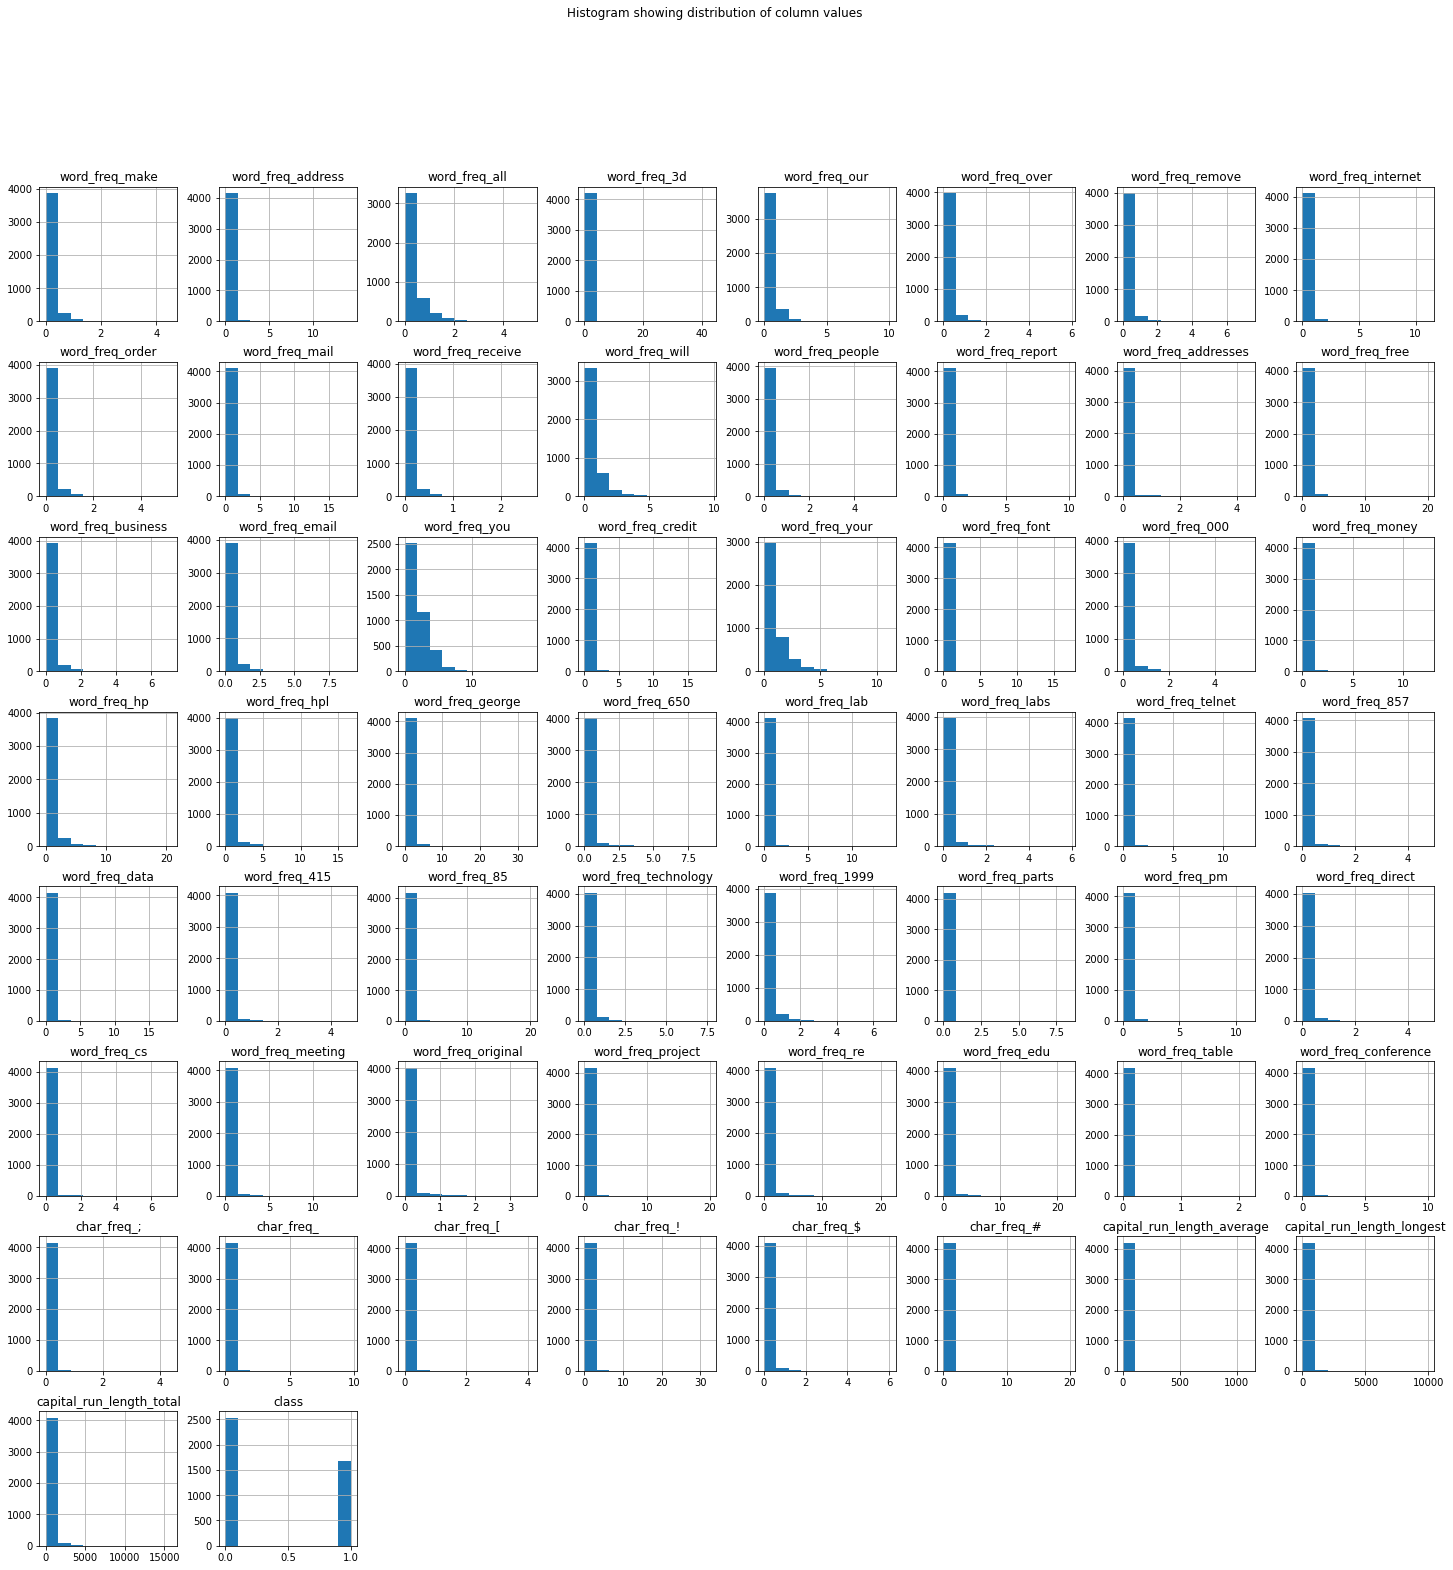

In [29]:

df.hist(bins=10, figsize=(25,25))
plt.suptitle("Histogram showing distribution of column values")
plt.savefig('Histogram')
# plt.figure.tight_layout(pad=3.0)
plt.show()

Lets have a closer look of the distribution here below

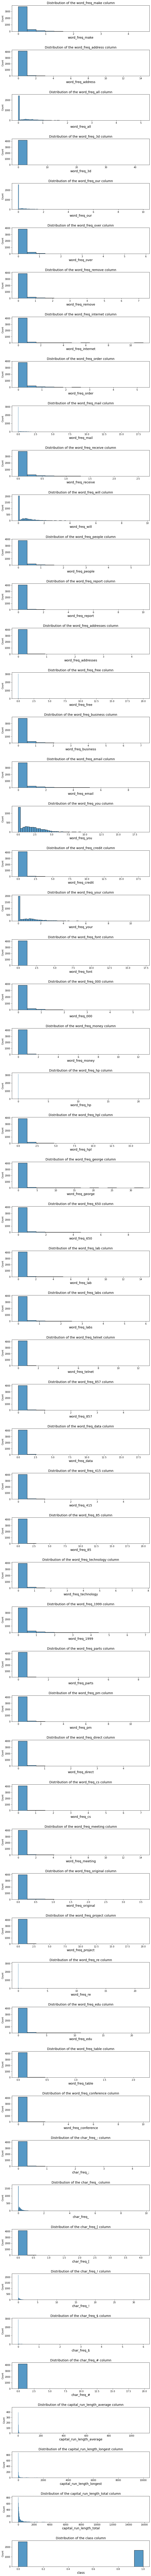

In [30]:

col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
fig, ax = plt.subplots(len(col_names), figsize = (10,160))
for i, col_val in enumerate(col_names):

    sns.histplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

###Bivariate

Lets find out what effect of the email being considered spam or not

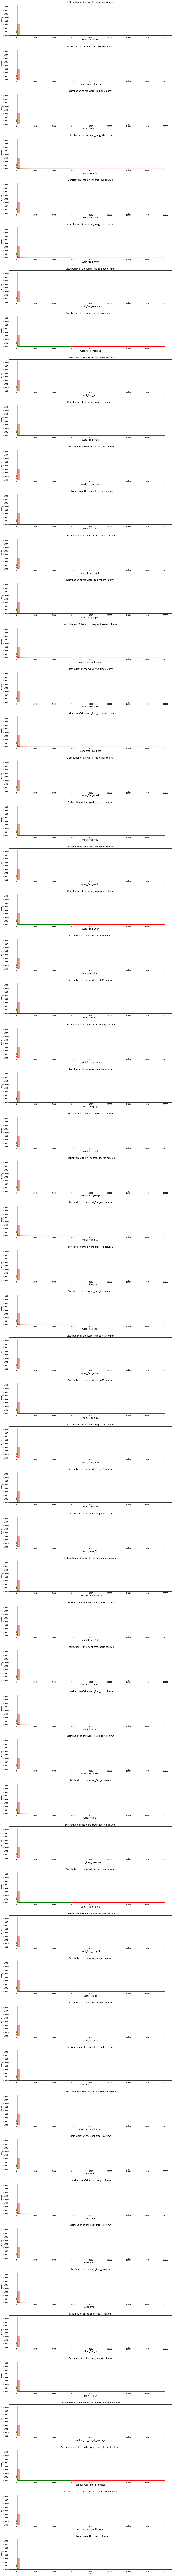

In [31]:
col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']


fig, ax = plt.subplots(len(col_names), figsize = (16, 230))
for i, col_val in enumerate(col_names):
    spam = df.loc[df['class']==1]    # Selecting only spam messages
    notspam = df.loc[df['class']==0]  # Selecting only non spam messages
    sns.distplot(spam, color ='red', label = 'spam message', ax=ax[i])
    sns.distplot(notspam, color ='green', label = 'not spam', ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

Our data seems to have a unimodal kind of distribution. We will need to scale the data for more accurate findings.

Checking for Multi-Collinearity The key goal of regression analysis is to isolate the relationship between each independent variables and the independent variable. The coefficient estimates can swing wildly based on which other independent variables are in the model. Multi-collinearity reduces the precision of the estimate co-efficients which weakens the statistical power of the regression model and that is why it is important for us to remove the multicollinear variables to be able to build an efficient model.

In [32]:

#Creating a dataframe for the correlations in our dataset.
correlations = df.corr()
correlations

Criteria                    word_freq_make  ...  class
Criteria                                    ...       
word_freq_make                        1.00  ...   0.13
word_freq_address                     0.03  ...   0.10
word_freq_all                         0.06  ...   0.17
word_freq_3d                          0.01  ...   0.06
word_freq_our                         0.02  ...   0.23
word_freq_over                        0.06  ...   0.21
word_freq_remove                      0.01  ...   0.33
word_freq_internet                   -0.00  ...   0.20
word_freq_order                       0.10  ...   0.22
word_freq_mail                        0.04  ...   0.13
word_freq_receive                     0.06  ...   0.27
word_freq_will                        0.08  ...  -0.01
word_freq_people                      0.06  ...   0.12
word_freq_report                      0.03  ...   0.05
word_freq_addresses                   0.02  ...   0.18
word_freq_free                        0.07  ...   0.28
word_freq_business                    0.08  ...   0.26
word_freq_email                       0.05  ...   0.19
word_freq_you                         0.12  ...   0.26
word_freq_credit                      0.02  ...   0.19
word_freq_your                        0.12  ...   0.39
word_freq_font                       -0.03  ...   0.09
word_freq_000                         0.13  ...   0.33
word_freq_money                       0.21  ...   0.21
word_freq_hp                         -0.08  ...  -0.27
word_freq_hpl                        -0.06  ...  -0.24
word_freq_george                     -0.05  ...  -0.17
word_freq_650                        -0.05  ...  -0.16
word_freq_lab                        -0.04  ...  -0.14
word_freq_labs                       -0.05  ...  -0.18
word_freq_telnet                     -0.04  ...  -0.13
word_freq_857                        -0.03  ...  -0.12
word_freq_data                       -0.04  ...  -0.12
word_freq_415                        -0.03  ...  -0.12
word_freq_85                         -0.05  ...  -0.15
word_freq_technology                 -0.06  ...  -0.15
word_freq_1999                       -0.06  ...  -0.20
word_freq_parts                      -0.01  ...  -0.03
word_freq_pm                         -0.01  ...  -0.13
word_freq_direct                     -0.04  ...  -0.06
word_freq_cs                         -0.01  ...  -0.11
word_freq_meeting                    -0.03  ...  -0.14
word_freq_original                   -0.03  ...  -0.15
word_freq_project                    -0.02  ...  -0.10
word_freq_re                         -0.04  ...  -0.15
word_freq_edu                        -0.03  ...  -0.15
word_freq_table                      -0.00  ...  -0.05
word_freq_conference                 -0.02  ...  -0.09
char_freq_;                          -0.03  ...  -0.07
char_freq_                           -0.02  ...  -0.11
char_freq_[                          -0.03  ...  -0.07
char_freq_!                           0.06  ...   0.23
char_freq_$                           0.10  ...   0.33
char_freq_#                          -0.01  ...   0.07
capital_run_length_average            0.04  ...   0.11
capital_run_length_longest            0.06  ...   0.20
capital_run_length_total              0.08  ...   0.23
class                                 0.13  ...   1.00

[58 rows x 58 columns]

We can see that several columns have linear correlation

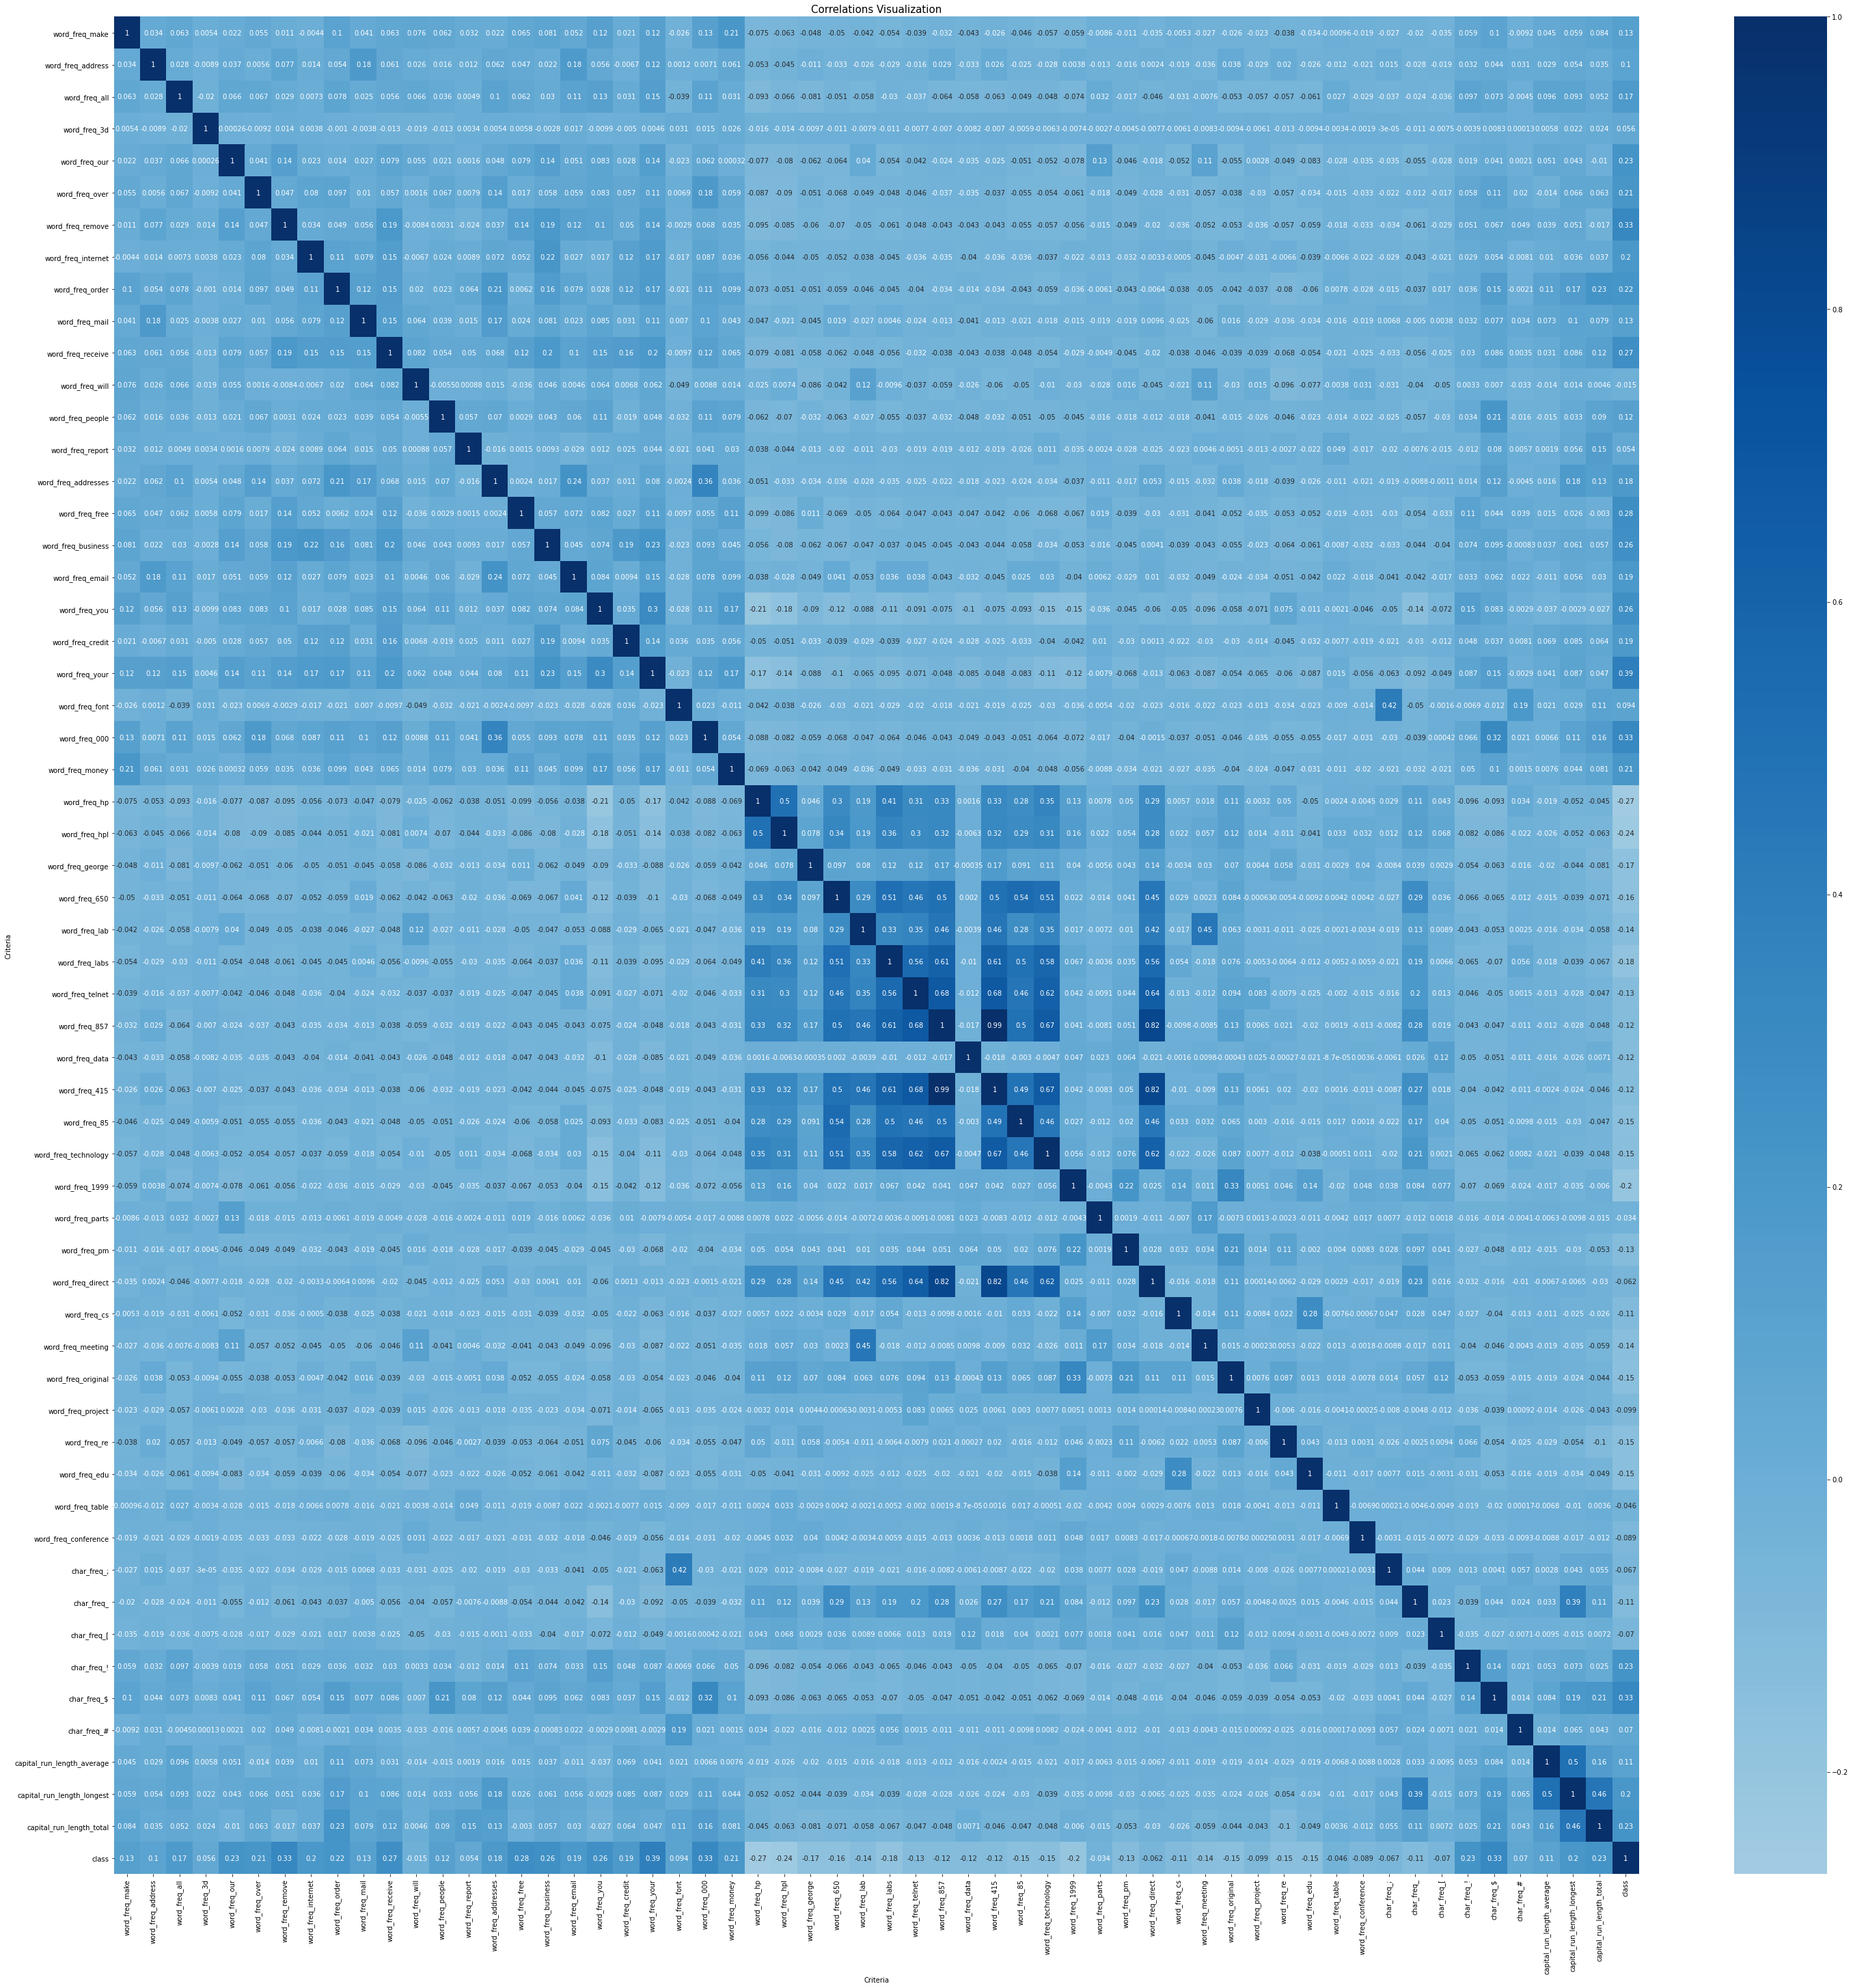

In [33]:

#Visualzing the correlations in our dataset
plt.figure(figsize = (50, 50))
sns.heatmap(correlations, annot = True, center = 0,cmap="Blues")
plt.title('Correlations Visualization', fontsize = 15)
plt.show()

As the classes increase that is (1-3) the fare also increases thus having the negative correlation of -0.55. This means there is a relation between fare and pclass.
There is also a slight correlation between fare and family size of 0.22.
There is also a slight correlation between fare and one's survival of 0.26.
There is also a slight correlation of age and pclass. Meaning the aged individuals were better economically thus boarding on the first class.
There is also a correlation between one's survival and pclass. Meaning th well economic individuals were given priority.

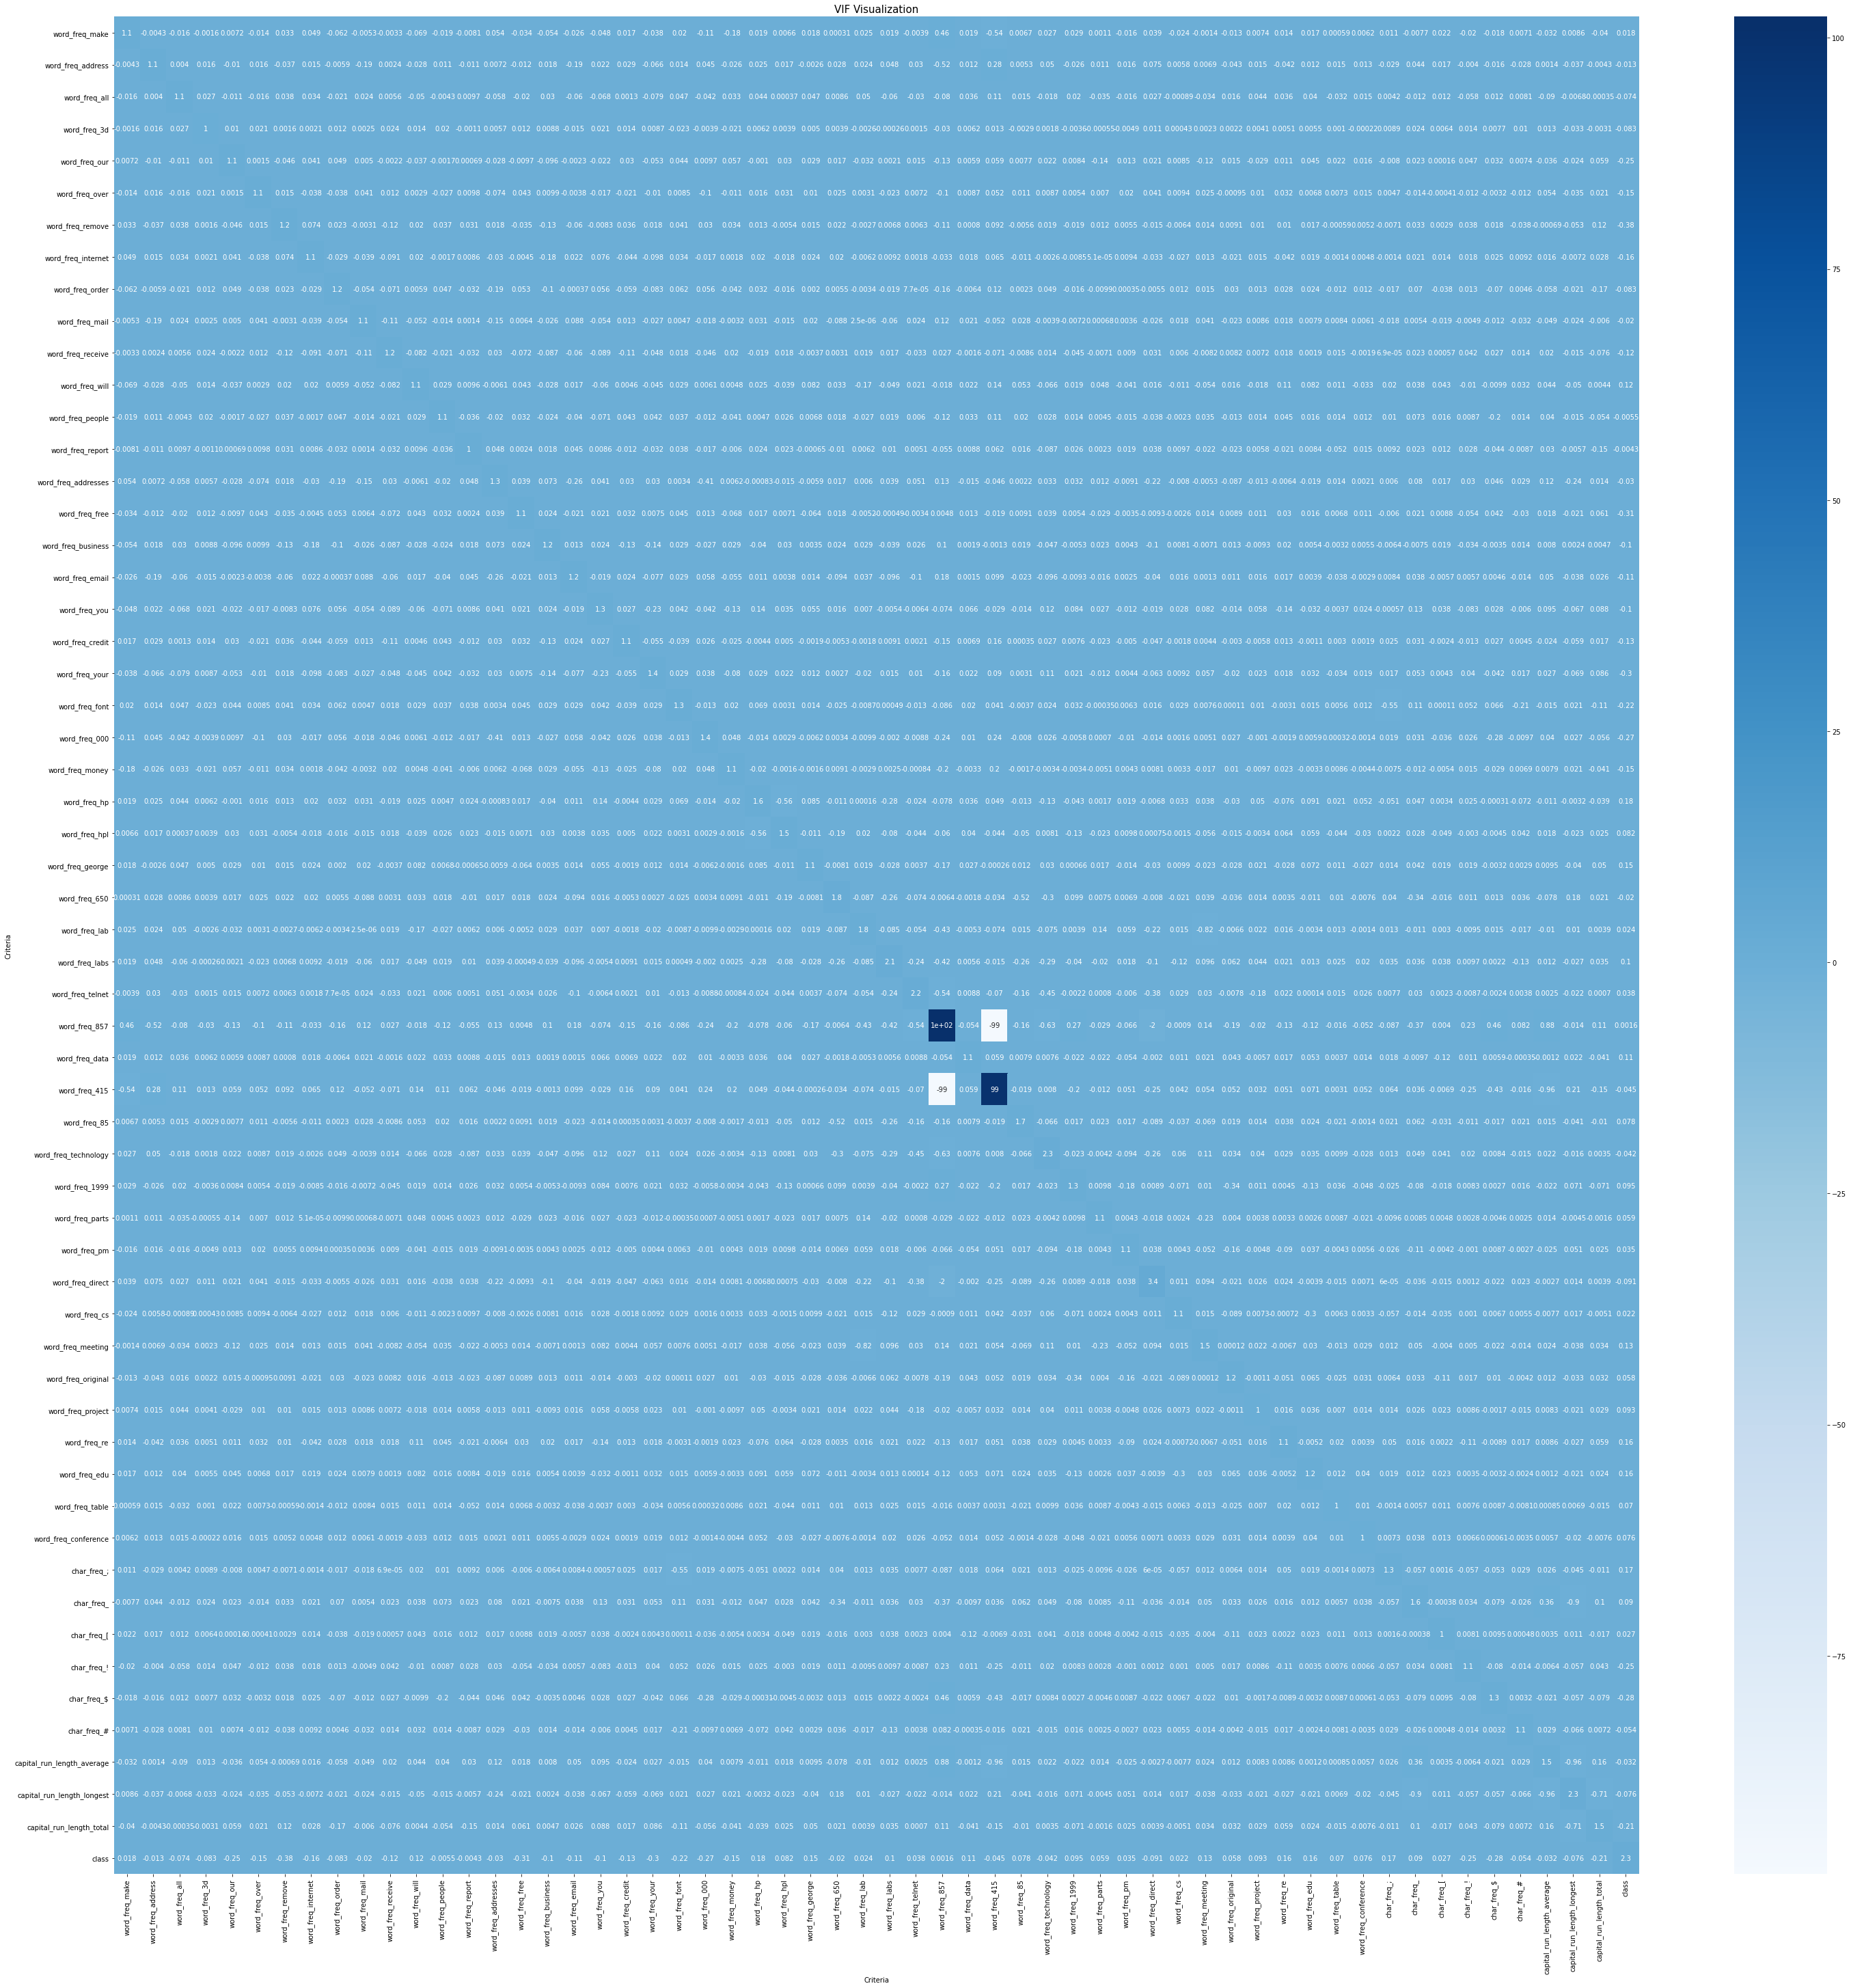

In [34]:
#Visualzing the VIF Score

vif = pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns )
plt.figure(figsize = (50,50))
sns.heatmap(vif, annot = True, center = 0, cmap="Blues")
plt.title('VIF Visualization', fontsize = 15)
plt.show()

There is no multi-collinearity in our independent variables.

##6. Implementing the solution Naive Bayes

There are three types of Naive Bayes model under the scikit-learn library: Gaussian: It is used in classification and it assumes that features follow a normal distribution.

1. Gaussian
2. Multinomial
3. Bernoulli

###Gaussian Naive Bayes

####Base Model 80/20 split

Lets attempt to fit the data to the base model

In [20]:
#Gaussian Naive Bayes


X = df[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']



# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.8242280285035629
Mean Absolute Error: 0.17577197149643706
Mean Squared Error: 0.17577197149643706
Root Mean Squared Error: 0.41925168037401717
The accuracy of the model is  0.8242280285035629

 Confusion matrix
[[383 132]
 [ 16 311]]

 Classification report
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       515
           1       0.70      0.95      0.81       327

    accuracy                           0.82       842
   macro avg       0.83      0.85      0.82       842
weighted avg       0.86      0.82      0.83       842



####Base Model - 70/30 split

In [21]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.8178939034045922
Mean Absolute Error: 0.18210609659540775
Mean Squared Error: 0.18210609659540775
Root Mean Squared Error: 0.4267389091650863
The accuracy of the model is  0.8178939034045922

 Confusion matrix
[[527 210]
 [ 20 506]]

 Classification report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       737
           1       0.71      0.96      0.81       526

    accuracy                           0.82      1263
   macro avg       0.84      0.84      0.82      1263
weighted avg       0.86      0.82      0.82      1263



####Base Model - 60/40 split

In [22]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.8254156769596199
Mean Absolute Error: 0.17458432304038005
Mean Squared Error: 0.17458432304038005
Root Mean Squared Error: 0.4178328888926529
The accuracy of the model is  0.8254156769596199

 Confusion matrix
[[724 270]
 [ 24 666]]

 Classification report
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       994
           1       0.71      0.97      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



####Grid Model - 80/20 split

In [34]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

#I used GridSearch to look for the best parameters

var_smoothing = list(range(-10, 10))

hyperparameters = dict(var_smoothing = var_smoothing)

classifier = GaussianNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = GaussianNB(var_smoothing = clf.best_params_['var_smoothing']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'var_smoothing': 0}




      Actual  Predicted
3801       0          0
2278       0          0
2869       0          1
210        1          1
3281       0          0
...      ...        ...
320        1          1
545        1          1
4161       0          1
2424       0          0
2931       0          1

[842 rows x 2 columns]


       Actual  Predicted
count  842.00     842.00
mean     0.41       0.57
std      0.49       0.50
min      0.00       0.00
25%      0.00       0.00
50%      0.00       1.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.18883610451306412
Mean Squared Error: 0.18883610451306412
Root Mean Squared Error: 0.43455276378486435
The accuracy of the model is  0.8111638954869359

 Confusion matrix
[[348 147]
 [ 12 335]]

 Classification report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       495
           1       0.70      0.97      0.81       347

    accuracy                 

####Grid Model - 70/30 split

In [35]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

#I used GridSearch to look for the best parameters

var_smoothing = list(range(-10, 10))

hyperparameters = dict(var_smoothing = var_smoothing)

classifier = GaussianNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = GaussianNB(var_smoothing = clf.best_params_['var_smoothing']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'var_smoothing': 0}




      Actual  Predicted
3801       0          0
2278       0          0
2869       0          1
210        1          1
3281       0          0
...      ...        ...
753        1          1
2          1          1
296        1          1
4306       0          1
301        1          1

[1263 rows x 2 columns]


       Actual  Predicted
count 1263.00    1263.00
mean     0.42       0.57
std      0.49       0.50
min      0.00       0.00
25%      0.00       0.00
50%      0.00       1.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.1828978622327791
Mean Squared Error: 0.1828978622327791
Root Mean Squared Error: 0.4276655962697714
The accuracy of the model is  0.8171021377672208

 Confusion matrix
[[526 211]
 [ 20 506]]

 Classification report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82       737
           1       0.71      0.96      0.81       526

    accuracy                   

####Grid Model - 60/40 split

In [36]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

#I used GridSearch to look for the best parameters

var_smoothing = list(range(-10, 10))

hyperparameters = dict(var_smoothing = var_smoothing)

classifier = GaussianNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = GaussianNB(var_smoothing = clf.best_params_['var_smoothing']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'var_smoothing': 0}




      Actual  Predicted
3801       0          0
2278       0          0
2869       0          1
210        1          1
3281       0          0
...      ...        ...
2338       0          1
1506       1          1
4139       0          1
4243       0          1
4214       0          1

[1684 rows x 2 columns]


       Actual  Predicted
count 1684.00    1684.00
mean     0.41       0.56
std      0.49       0.50
min      0.00       0.00
25%      0.00       0.00
50%      0.00       1.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.17695961995249407
Mean Squared Error: 0.17695961995249407
Root Mean Squared Error: 0.4206656866830168
The accuracy of the model is  0.8230403800475059

 Confusion matrix
[[720 274]
 [ 24 666]]

 Classification report
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       994
           1       0.71      0.97      0.82       690

    accuracy                 

###Multinomial Naive Bayes

####Base Model 80/20 split

Lets attempt to fit the data to the base model

In [64]:
#Gaussian Naive Bayes


X = df[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']



# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

# Training our model
# 
clf = MultinomialNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.7838479809976246
Mean Absolute Error: 0.2161520190023753
Mean Squared Error: 0.2161520190023753
Root Mean Squared Error: 0.464921519186169
The accuracy of the model is  0.7838479809976246

 Confusion matrix
[[439  76]
 [106 221]]

 Classification report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       515
           1       0.74      0.68      0.71       327

    accuracy                           0.78       842
   macro avg       0.77      0.76      0.77       842
weighted avg       0.78      0.78      0.78       842



####Base Model - 70/30 split

In [65]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Training our model
# 
clf = MultinomialNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.7783056215360253
Mean Absolute Error: 0.22169437846397466
Mean Squared Error: 0.22169437846397466
Root Mean Squared Error: 0.47084432508417756
The accuracy of the model is  0.7783056215360253

 Confusion matrix
[[628 109]
 [171 355]]

 Classification report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       737
           1       0.77      0.67      0.72       526

    accuracy                           0.78      1263
   macro avg       0.78      0.76      0.77      1263
weighted avg       0.78      0.78      0.78      1263



####Base Model - 60/40 split

In [66]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# Training our model
# 
clf = MultinomialNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.767814726840855
Mean Absolute Error: 0.2321852731591449
Mean Squared Error: 0.2321852731591449
Root Mean Squared Error: 0.48185607099957234
The accuracy of the model is  0.767814726840855

 Confusion matrix
[[837 157]
 [234 456]]

 Classification report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       994
           1       0.74      0.66      0.70       690

    accuracy                           0.77      1684
   macro avg       0.76      0.75      0.76      1684
weighted avg       0.77      0.77      0.77      1684



####Grid Model - 80/20 split

In [67]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#I used GridSearch to look for the best parameters


alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

classifier = MultinomialNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = MultinomialNB(alpha = clf.best_params_['alpha'], class_prior = clf.best_params_['class_prior'], fit_prior = clf.best_params_['fit_prior']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'alpha': 0, 'class_prior': None, 'fit_prior': False}




      Actual  Predicted
3801       0          0
2278       0          1
2869       0          1
210        1          1
3281       0          1
...      ...        ...
320        1          1
545        1          1
4161       0          1
2424       0          0
2931       0          1

[842 rows x 2 columns]


       Actual  Predicted
count  842.00     842.00
mean     0.41       0.69
std      0.49       0.46
min      0.00       0.00
25%      0.00       0.00
50%      0.00       1.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.28741092636579574
Mean Squared Error: 0.28741092636579574
Root Mean Squared Error: 0.5361071967114374
The accuracy of the model is  0.7125890736342043

 Confusion matrix
[[256 239]
 [  3 344]]

 Classification report
              precision    recall  f1-score   support

           0       0.99      0.52      0.68       495
           1       0.59      0.99      0.74       34

####Grid Model - 70/30 split

In [68]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#I used GridSearch to look for the best parameters


alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

classifier = MultinomialNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = MultinomialNB(alpha = clf.best_params_['alpha'], class_prior = clf.best_params_['class_prior'], fit_prior = clf.best_params_['fit_prior']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'alpha': 0, 'class_prior': None, 'fit_prior': True}




      Actual  Predicted
3801       0          0
2278       0          1
2869       0          1
210        1          1
3281       0          0
...      ...        ...
753        1          1
2          1          1
296        1          1
4306       0          1
301        1          1

[1263 rows x 2 columns]


       Actual  Predicted
count 1263.00    1263.00
mean     0.42       0.68
std      0.49       0.47
min      0.00       0.00
25%      0.00       0.00
50%      0.00       1.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.28028503562945367
Mean Squared Error: 0.28028503562945367
Root Mean Squared Error: 0.5294195270571852
The accuracy of the model is  0.7197149643705463

 Confusion matrix
[[391 346]
 [  8 518]]

 Classification report
              precision    recall  f1-score   support

           0       0.98      0.53      0.69       737
           1       0.60      0.98      0.75       52

####Grid Model - 60/40 split

In [69]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#I used GridSearch to look for the best parameters


alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

classifier = MultinomialNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = MultinomialNB(alpha = clf.best_params_['alpha'], class_prior = clf.best_params_['class_prior'], fit_prior = clf.best_params_['fit_prior']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'alpha': 0, 'class_prior': None, 'fit_prior': True}




      Actual  Predicted
3801       0          0
2278       0          1
2869       0          1
210        1          1
3281       0          0
...      ...        ...
2338       0          1
1506       1          1
4139       0          1
4243       0          1
4214       0          1

[1684 rows x 2 columns]


       Actual  Predicted
count 1684.00    1684.00
mean     0.41       0.69
std      0.49       0.46
min      0.00       0.00
25%      0.00       0.00
50%      0.00       1.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.28919239904988125
Mean Squared Error: 0.28919239904988125
Root Mean Squared Error: 0.5377661192841003
The accuracy of the model is  0.7108076009501187

 Confusion matrix
[[516 478]
 [  9 681]]

 Classification report
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       994
           1       0.59      0.99      0.74       69

###Bernoulli Naive Bayes

####Base Model 80/20 split

Lets attempt to fit the data to the base model

In [73]:
#Gaussian Naive Bayes


X = df[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']



# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

# Training our model
# 
clf = BernoulliNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.8883610451306413
Mean Absolute Error: 0.11163895486935867
Mean Squared Error: 0.11163895486935867
Root Mean Squared Error: 0.334124160858443
The accuracy of the model is  0.8883610451306413

 Confusion matrix
[[479  36]
 [ 58 269]]

 Classification report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       515
           1       0.88      0.82      0.85       327

    accuracy                           0.89       842
   macro avg       0.89      0.88      0.88       842
weighted avg       0.89      0.89      0.89       842



####Base Model - 70/30 split

In [74]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Training our model
# 
clf = BernoulliNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.8939034045922407
Mean Absolute Error: 0.1060965954077593
Mean Squared Error: 0.1060965954077593
Root Mean Squared Error: 0.32572472335970953
The accuracy of the model is  0.8939034045922407

 Confusion matrix
[[691  46]
 [ 88 438]]

 Classification report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       737
           1       0.90      0.83      0.87       526

    accuracy                           0.89      1263
   macro avg       0.90      0.89      0.89      1263
weighted avg       0.89      0.89      0.89      1263



####Base Model - 60/40 split

In [75]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# Training our model
# 
clf = BernoulliNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.8931116389548693
Mean Absolute Error: 0.10688836104513064
Mean Squared Error: 0.10688836104513064
Root Mean Squared Error: 0.32693785502007966
The accuracy of the model is  0.8931116389548693

 Confusion matrix
[[937  57]
 [123 567]]

 Classification report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       994
           1       0.91      0.82      0.86       690

    accuracy                           0.89      1684
   macro avg       0.90      0.88      0.89      1684
weighted avg       0.89      0.89      0.89      1684



####Grid Model - 80/20 split

In [76]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#I used GridSearch to look for the best parameters


alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

classifier = BernoulliNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = BernoulliNB(alpha = clf.best_params_['alpha'], class_prior = clf.best_params_['class_prior'], fit_prior = clf.best_params_['fit_prior']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'alpha': 0, 'class_prior': None, 'fit_prior': False}




      Actual  Predicted
3801       0          0
2278       0          0
2869       0          0
210        1          1
3281       0          0
...      ...        ...
320        1          0
545        1          0
4161       0          0
2424       0          0
2931       0          1

[842 rows x 2 columns]


       Actual  Predicted
count  842.00     842.00
mean     0.41       0.36
std      0.49       0.48
min      0.00       0.00
25%      0.00       0.00
50%      0.00       0.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.0997624703087886
Mean Squared Error: 0.0997624703087886
Root Mean Squared Error: 0.3158519753124691
The accuracy of the model is  0.9002375296912114

 Confusion matrix
[[476  19]
 [ 65 282]]

 Classification report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       495
           1       0.94      0.81      0.87       347


####Grid Model - 70/30 split

In [77]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#I used GridSearch to look for the best parameters


alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

classifier = BernoulliNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = BernoulliNB(alpha = clf.best_params_['alpha'], class_prior = clf.best_params_['class_prior'], fit_prior = clf.best_params_['fit_prior']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'alpha': 2, 'class_prior': None, 'fit_prior': True}




      Actual  Predicted
3801       0          0
2278       0          0
2869       0          0
210        1          1
3281       0          0
...      ...        ...
753        1          1
2          1          1
296        1          1
4306       0          0
301        1          1

[1263 rows x 2 columns]


       Actual  Predicted
count 1263.00    1263.00
mean     0.42       0.36
std      0.49       0.48
min      0.00       0.00
25%      0.00       0.00
50%      0.00       0.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.1021377672209026
Mean Squared Error: 0.1021377672209026
Root Mean Squared Error: 0.31958999862464815
The accuracy of the model is  0.8978622327790974

 Confusion matrix
[[711  26]
 [103 423]]

 Classification report
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       737
           1       0.94      0.80      0.87       526

####Grid Model - 60/40 split

In [78]:
# split the data into labels and features

X = df[['word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#I used GridSearch to look for the best parameters


alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

classifier = BernoulliNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = BernoulliNB(alpha = clf.best_params_['alpha'], class_prior = clf.best_params_['class_prior'], fit_prior = clf.best_params_['fit_prior']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'alpha': 3, 'class_prior': None, 'fit_prior': True}




      Actual  Predicted
3801       0          0
2278       0          0
2869       0          0
210        1          1
3281       0          0
...      ...        ...
2338       0          1
1506       1          1
4139       0          0
4243       0          0
4214       0          1

[1684 rows x 2 columns]


       Actual  Predicted
count 1684.00    1684.00
mean     0.41       0.35
std      0.49       0.48
min      0.00       0.00
25%      0.00       0.00
50%      0.00       0.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.10510688836104513
Mean Squared Error: 0.10510688836104513
Root Mean Squared Error: 0.3242019252889241
The accuracy of the model is  0.8948931116389549

 Confusion matrix
[[958  36]
 [141 549]]

 Classification report
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       994
           1       0.94      0.80      0.86       69

##7. Conclusion

In [83]:
# Lets compare the performance of our different models

# initialize list of lists
data = ['Gaussian Naive Bayes Baseline Model 80/20 split',0.17577197149643706,0.17577197149643706,0.41925168037401717, '82.4%'], ['Gaussian Naive Bayes Baseline Model 70/30 split', 0.18210609659540775,0.18210609659540775,0.4267389091650863,'82%'], ['Gaussian Naive Bayes Baseline Model 60/40 split',  0.17458432304038005,0.17458432304038005,0.4178328888926529,'83%'],  ['Gaussian Naive Bayes with Grid search Model - 80/20 split', 0.18883610451306412,0.18883610451306412,0.43455276378486435,'81.1%'], ['Gaussian Naive Bayes with Grid search Model - 70/30 split',  0.1828978622327791,0.1828978622327791,0.4276655962697714,'82%'],  ['Gaussian Naive Bayes with Grid search Model - 60/40 split', 0.17695961995249407,0.17695961995249407,0.4206656866830168,'82.3%'], ['Multinomial Naive Bayes Baseline Model 80/20 split',0.2161520190023753,0.2161520190023753,0.464921519186169,'78.3%'],['Multinomial Naive Bayes Baseline Model 70/30 split', 0.22169437846397466,0.22169437846397466,0.47084432508417756,'77.8%'], ['Multinomial Naive Bayes Baseline Model 60/40 split',  0.2321852731591449,0.2321852731591449,0.48185607099957234,'76.8'], ['Multinomial Naive Bayes with Grid search Model - 80/20 split', 0.28741092636579574,0.28741092636579574,0.5361071967114374,'71.3%'], ['Multinomial Naive Bayes with Grid search Model - 70/30 split',  0.28028503562945367,0.28028503562945367,0.5294195270571852,'72%'], ['Multinomial Naive Bayes with Grid search Model - 60/40 split', 0.28919239904988125,0.28919239904988125,0.5377661192841003,'71.1%'], ['Bernoulli Naive Bayes Baseline Model 80/20 split',0.11163895486935867,0.11163895486935867,0.334124160858443,'88.8%'], ['Bernoulli Naive Bayes Baseline Model 70/30 split',0.1060965954077593,0.1060965954077593,0.32572472335970953,'89.4%'], ['Bernoulli Naive Bayes Baseline Model 60/40 split',   0.10688836104513064,0.10688836104513064,0.32693785502007966,'89.3%'], ['Bernoulli Naive Bayes with Grid search Model - 80/20 split', 0.0997624703087886,0.0997624703087886,0.3158519753124691,'90%'], ['Bernoulli Naive Bayes with Grid search Model - 70/30 split',  0.1021377672209026,0.1021377672209026,0.31958999862464815,'89.8%'], ['Bernoulli Naive Bayes with Grid search Model - 60/40 split', 0.10510688836104513,0.10510688836104513,0.3242019252889241,'89.5%']
 
# Create the pandas DataFrame

df = pd.DataFrame(data, columns = ['Model_Name','Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error','Accuracy'])
 
# print dataframe.
print(df )

                                           Model_Name  ...  Accuracy
0     Gaussian Naive Bayes Baseline Model 80/20 split  ...     82.4%
1     Gaussian Naive Bayes Baseline Model 70/30 split  ...       82%
2     Gaussian Naive Bayes Baseline Model 60/40 split  ...       83%
3   Gaussian Naive Bayes with Grid search Model - ...  ...     81.1%
4   Gaussian Naive Bayes with Grid search Model - ...  ...       82%
5   Gaussian Naive Bayes with Grid search Model - ...  ...     82.3%
6   Multinomial Naive Bayes Baseline Model 80/20 s...  ...     78.3%
7   Multinomial Naive Bayes Baseline Model 70/30 s...  ...     77.8%
8   Multinomial Naive Bayes Baseline Model 60/40 s...  ...      76.8
9   Multinomial Naive Bayes with Grid search Model...  ...     71.3%
10  Multinomial Naive Bayes with Grid search Model...  ...       72%
11  Multinomial Naive Bayes with Grid search Model...  ...     71.1%
12   Bernoulli Naive Bayes Baseline Model 80/20 split  ...     88.8%
13   Bernoulli Naive Bayes Baselin

In [85]:
model_compare = pd.DataFrame(df )  
model_compare.set_index('Model_Name')

Mean Absolute Error  ...  Accuracy
Model_Name                                                               ...          
Gaussian Naive Bayes Baseline Model 80/20 split                    0.18  ...     82.4%
Gaussian Naive Bayes Baseline Model 70/30 split                    0.18  ...       82%
Gaussian Naive Bayes Baseline Model 60/40 split                    0.17  ...       83%
Gaussian Naive Bayes with Grid search Model - 8...                 0.19  ...     81.1%
Gaussian Naive Bayes with Grid search Model - 7...                 0.18  ...       82%
Gaussian Naive Bayes with Grid search Model - 6...                 0.18  ...     82.3%
Multinomial Naive Bayes Baseline Model 80/20 split                 0.22  ...     78.3%
Multinomial Naive Bayes Baseline Model 70/30 split                 0.22  ...     77.8%
Multinomial Naive Bayes Baseline Model 60/40 split                 0.23  ...      76.8
Multinomial Naive Bayes with Grid search Model ...                 0.29  ...     71.3%
Multinomial Naive Bayes with Grid search Model ...                 0.28  ...       72%
Multinomial Naive Bayes with Grid search Model ...                 0.29  ...     71.1%
Bernoulli Naive Bayes Baseline Model 80/20 split                   0.11  ...     88.8%
Bernoulli Naive Bayes Baseline Model 70/30 split                   0.11  ...     89.4%
Bernoulli Naive Bayes Baseline Model 60/40 split                   0.11  ...     89.3%
Bernoulli Naive Bayes with Grid search Model - ...                 0.10  ...       90%
Bernoulli Naive Bayes with Grid search Model - ...                 0.10  ...     89.8%
Bernoulli Naive Bayes with Grid search Model - ...                 0.11  ...     89.5%

[18 rows x 4 columns]

As per the table above, the best performing model was the Bernoulli Naive Bayes with Grid search Model and a 80/20 split. scoring an accuracy of 90%

I was able to achieve my metric of success of 90%.

The least performing model was the Multinomial Naive Bayes with Grid search and a 60/40 split. which is interesting cause I had expected that with grid search, the results will always be better than a base model

Only one of my models achieved an accuracy score of more than 90%.
